In [61]:
Ind = ['3_1', '5_1', '7_1', '8_19']
Indlabel=['$3_1$', '$5_1$', '$7_1$', '$8_{19}$']

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [62]:
#reading writhe and kymo data
Nbeads = 500
time = 1000
replicas = 64 #64

In [63]:
def random(file1, file2, title, skipheader=0):    
    f=open(file1,"r")
    lines=f.readlines()[3:] # skip 3 lines of header
    start=[]
    end=[]
    length=[]

    # adding +/- 10 beads buffer
    for x in lines:
        st = (int(x.split(' ')[3]) - 10 ) % Nbeads
        start.append(st)
        en = (int(x.split(' ')[4]) + 10 ) % Nbeads
        end.append(en)
        l = int(x.split(' ')[5]) + 20
        length.append(l)
    f.close()

    g=open(file2,"r")
    lines = g.readlines()[skipheader:] #skip header
    maxvals=[]
    for x in lines:
        maxvals.append(int(x.split(' ')[2]))
    g.close()

    prob = 0
    #ring is circular, need to take into account both ends
    for j in range(time):
        if (start[j]>end[j]):
            if ((maxvals[j]>=start[j]) or (maxvals[j]<=end[j])):
                prob+=1
        elif (start[j]<end[j]):
            if ((maxvals[j]>start[j]) and (maxvals[j]<end[j])):
                prob+=1
                
    averagelength = np.mean(length)
    #randomprob is the probability of picking a bead inside the knot by chance
    randomprob = averagelength/Nbeads
    
    # initialize list of lists
    data.append([Indlabel[i], rep, randomprob, prob/(time*randomprob), title])    
    return

In [64]:
def correlate(file1, file2, title, index=2, skipheader=0):    
    f=open(file1,"r")
    lines=f.readlines()[3:] # skip 3 lines of header
    start=[]
    end=[]
    length=[]

    # adding +/- 10 beads buffer
    for x in lines:
        st = (int(x.split(' ')[3]) - 10 ) % Nbeads
        start.append(st)
        en = (int(x.split(' ')[4]) + 10 ) % Nbeads
        end.append(en)
        l = int(x.split(' ')[5]) + 20
        length.append(l)
    f.close()

    g=open(file2,"r")
    lines = g.readlines()[skipheader:] #skip header
    maxvals=[]
    for x in lines:
        maxvals.append(int(x.split(' ')[index]))
    g.close()

    prob = 0
    #ring is circular, need to take into account both ends
    for j in range(time):
        if (start[j]>end[j]):
            if ((maxvals[j]>=start[j]) or (maxvals[j]<=end[j])):
                prob+=1
        elif (start[j]<end[j]):
            if ((maxvals[j]>start[j]) and (maxvals[j]<end[j])):
                prob+=1
                
    averagelength = np.mean(length)
    #randomprob is the probability of picking a bead inside the knot by chance
    randomprob = averagelength/Nbeads
    
    # initialize list of lists
    data.append([Indlabel[i], rep, prob/time, prob/(time*randomprob), title])
    return

In [65]:
data = []
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\Round2\KNOT"+str(i)+"\LCWMAX_KNOT"+str(Ind[i])+str(rep) + ".dat"
        random(file1, file2, "Random Probability")
                
        file1 = "D:\SH\Round2\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        correlate(file1, file2, "Local Curvature")

        file2 = "D:\SH\Round2\KNOT"+str(i)+"\LDMAX_KNOT"+str(Ind[i])+str(rep) + ".dat"
        correlate(file1, file2, "Local Density")

        file1 = "D:\SH\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\KNOT"+str(i)+"\WritheMAX_KNOT"+str(Ind[i])+str(rep) + ".lp50.dat"
        correlate(file1, file2, "1D Writhe", skipheader=1)
        correlate(file1, file2, "3D Writhe", index=4, skipheader=1)

df = pd.DataFrame(data, columns = ['Knot Type', 'Replica #', 'Correlation Fraction', 'Correlation Score', 'Representation'])
df.to_csv("KnotColocalisationScoreWithBuffer.csv")

c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.9% of the points c

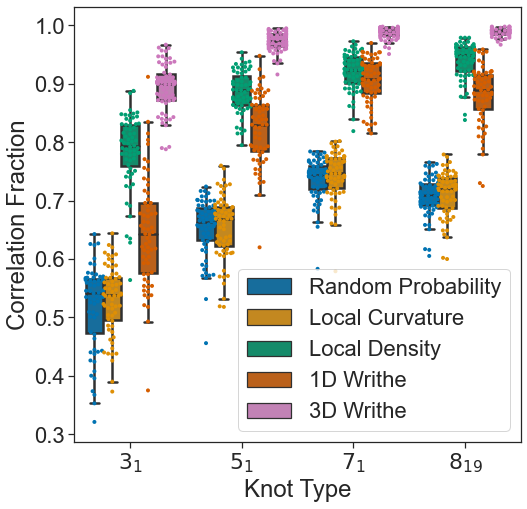

In [66]:
#set figure details
sns.set_theme(style="ticks", palette="colorblind", font_scale=2)
st = sns.axes_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.figure(figsize=(8,8))

#swarmplot
sns.swarmplot(x="Knot Type", y="Correlation Fraction", hue="Representation", data=df, size=4, dodge=True)

ax1 = sns.boxplot(x="Knot Type", y="Correlation Fraction",hue="Representation",data=df, linewidth=2.5, showfliers=False)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles[0:], labels=labels[0:5])

plt.savefig("CorrelationFraction64FinalWithBuffer.pdf")

In [49]:
data = []
#Random
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\KNOT"+str(i)+"\WritheMAX_KNOT"+str(Ind[i])+str(rep) + ".lp50.dat"
        f=open(file1,"r")
        lines=f.readlines()[3:] # skip 3 lines of header
        start=[]
        end=[]
        length=[]
        #check if BU_KNOT file is complete
        if (len(lines)<5):
            continue
        # adding +/- 10 beads buffer
        for x in lines:
            st = (int(x.split(' ')[3]) - 10 ) % Nbeads
            start.append(st)
            en = (int(x.split(' ')[4]) + 10 ) % Nbeads
            end.append(en)
            l = int(x.split(' ')[5]) + 20
            length.append(l)
        f.close()
        g=open(file2,"r")
        lines = g.readlines()[1:] #skip header
        max1dwr=[]
        for x in lines:
            max1dwr.append(int(x.split(' ')[2]))
        g.close()

        #max1dwrithe
        prob = 0
        #ring is circular, need to take into account both ends
        for j in range(time):
            if (start[j]>end[j]):
                if ((max1dwr[j]>=start[j]) or (max1dwr[j]<=end[j])):
                    prob+=1
            elif (start[j]<end[j]):
                if ((max1dwr[j]>start[j]) and (max1dwr[j]<end[j])):
                    prob+=1
                    
        averagelength = np.mean(length)
        #randomprob is the probability of picking a bead inside the knot by chance
        randomprob = averagelength/Nbeads
        
        
#         print('%d %.3f %.3f %.3f %.3f'%(((i*replicas)+rep), prob/time, prob/(time*randomprob), prob/time, prob/(time*randomprob)))
        
        # initialize list of lists
        data.append([Indlabel[i], rep, randomprob, prob/(time*randomprob), "Random Probability"])
        
        
#LC      
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\Round2\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\Round2\KNOT"+str(i)+"\LCWMAX_KNOT"+str(Ind[i])+str(rep) + ".dat"
        f=open(file1,"r")
        lines=f.readlines()[3:] # skip 3 lines of header
        start=[]
        end=[]
        length=[]
        #check if BU_KNOT file is complete
        if (len(lines)<5):
            continue
        # adding +/- 10 beads buffer
        for x in lines:
            st = (int(x.split(' ')[3]) - 10 ) % Nbeads
            start.append(st)
            en = (int(x.split(' ')[4]) + 10 ) % Nbeads
            end.append(en)
            l = int(x.split(' ')[5]) + 20
            length.append(l)
        f.close()
        g=open(file2,"r")
        lines = g.readlines()
        maxlcw=[]
        for x in lines:
            maxlcw.append(int(x.split(' ')[2]))
        g.close()
#         print(maxlcw)    

        #maxlcw
        prob = 0
        #ring is circular, need to take into account both ends
        for j in range(time):
            if (start[j]>end[j]):
                if ((maxlcw[j]>=start[j]) or (maxlcw[j]<=end[j])):
                    prob+=1
            elif (start[j]<end[j]):
                if ((maxlcw[j]>start[j]) and (maxlcw[j]<end[j])):
                    prob+=1
                    
        averagelength = np.mean(length)
        #randomprob is the probability of picking a bead inside the knot by chance
        randomprob = averagelength/Nbeads
        
        
#         print('%d %.3f %.3f %.3f %.3f'%(((i*replicas)+rep), prob/time, prob/(time*randomprob), prob/time, prob/(time*randomprob)))
        
        # initialize list of lists
        data.append([Indlabel[i], rep, prob/time, prob/(time*randomprob), "Local Curvature"])

#LD
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\Round2\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\Round2\KNOT"+str(i)+"\LDMAX_KNOT"+str(Ind[i])+str(rep) + ".dat"
        f=open(file1,"r")
        lines=f.readlines()[3:] # skip 3 lines of header
        start=[]
        end=[]
        length=[]
        #check if BU_KNOT file is complete
        if (len(lines)<5):
            continue
        # adding +/- 10 beads buffer
        for x in lines:
            st = (int(x.split(' ')[3]) - 10 ) % Nbeads
            start.append(st)
            en = (int(x.split(' ')[4]) + 10 ) % Nbeads
            end.append(en)
            l = int(x.split(' ')[5]) + 20
            length.append(l)
        f.close()
        g=open(file2,"r")
        lines = g.readlines()
        maxld=[]
        for x in lines:
            maxld.append(int(x.split(' ')[2]))
        g.close()
#         print(maxld)    

        #maxld
        prob = 0
        #ring is circular, need to take into account both ends
        for j in range(time):
            if (start[j]>end[j]):
                if ((maxld[j]>=start[j]) or (maxld[j]<=end[j])):
                    prob+=1
            elif (start[j]<end[j]):
                if ((maxld[j]>start[j]) and (maxld[j]<end[j])):
                    prob+=1
                    
        averagelength = np.mean(length)
        #randomprob is the probability of picking a bead inside the knot by chance
        randomprob = averagelength/Nbeads
                
        # initialize list of lists
        data.append([Indlabel[i], rep, prob/time, prob/(time*randomprob), "Local Density"])        
        
        
#1DWrithe
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\KNOT"+str(i)+"\WritheMAX_KNOT"+str(Ind[i])+str(rep) + ".lp50.dat"
        f=open(file1,"r")
        lines=f.readlines()[3:] # skip 3 lines of header
        start=[]
        end=[]
        length=[]
        #check if BU_KNOT file is complete
        if (len(lines)<5):
            continue
        # adding +/- 10 beads buffer
        for x in lines:
            st = (int(x.split(' ')[3]) - 10 ) % Nbeads
            start.append(st)
            en = (int(x.split(' ')[4]) + 10 ) % Nbeads
            end.append(en)
            l = int(x.split(' ')[5]) + 20
            length.append(l)
        f.close()
        g=open(file2,"r")
        lines = g.readlines()[1:] #skip header
        max1dwr=[]
        for x in lines:
            max1dwr.append(int(x.split(' ')[2]))
        g.close()
#         print(max1dwr)    

        #max1dwrithe
        prob = 0
        #ring is circular, need to take into account both ends
        for j in range(time):
            if (start[j]>end[j]):
                if ((max1dwr[j]>=start[j]) or (max1dwr[j]<=end[j])):
                    prob+=1
            elif (start[j]<end[j]):
                if ((max1dwr[j]>start[j]) and (max1dwr[j]<end[j])):
                    prob+=1
                    
        averagelength = np.mean(length)
        #randomprob is the probability of picking a bead inside the knot by chance
        randomprob = averagelength/Nbeads
                
        # initialize list of lists
        data.append([Indlabel[i], rep, prob/time, prob/(time*randomprob), "1D Writhe"])
        
#3DWRITHE
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\KNOT"+str(i)+"\WritheMAX_KNOT"+str(Ind[i])+str(rep) + ".lp50.dat"
        f=open(file1,"r")
        lines=f.readlines()[3:] # skip 3 lines of header
        start=[]
        end=[]
        length=[]
        #check if BU_KNOT file is complete
        if (len(lines)<5):
            continue
        # adding +/- 10 beads buffer
        for x in lines:
            st = (int(x.split(' ')[3]) - 10 ) % Nbeads
            start.append(st)
            en = (int(x.split(' ')[4]) + 10 ) % Nbeads
            end.append(en)
            l = int(x.split(' ')[5]) + 20
            length.append(l)
        f.close()

        g=open(file2,"r")
        lines = g.readlines()[1:] #skip header
        max3dwr=[]
        for x in lines:
            max3dwr.append(int(x.split(' ')[4]))
        g.close()
#         print(max3dwr)    

        #max3dwrithe
        prob = 0
        #ring is circular, need to take into account both ends
        for j in range(time):
            if (start[j]>end[j]):
                if ((max3dwr[j]>=start[j]) or (max3dwr[j]<=end[j])):
                    prob+=1
            elif (start[j]<end[j]):
                if ((max3dwr[j]>start[j]) and (max3dwr[j]<end[j])):
                    prob+=1
                    
        averagelength = np.mean(length)
        #randomprob is the probability of picking a bead inside the knot by chance
        randomprob = averagelength/Nbeads
        
        
#         print('%d %.3f %.3f %.3f %.3f'%(((i*replicas)+rep), prob/time, prob/(time*randomprob), prob/time, prob/(time*randomprob)))
        
        # initialize list of lists
        data.append([Indlabel[i], rep, prob/time, prob/(time*randomprob), "3D Writhe"])        
        
        
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Knot Type', 'Replica #', 'Correlation Fraction', 'Correlation Score', 'Representation'])
# print dataframe.
df
df.to_csv("KnotColocalisationScoreTESTTEST.csv")

c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.9% of the points c

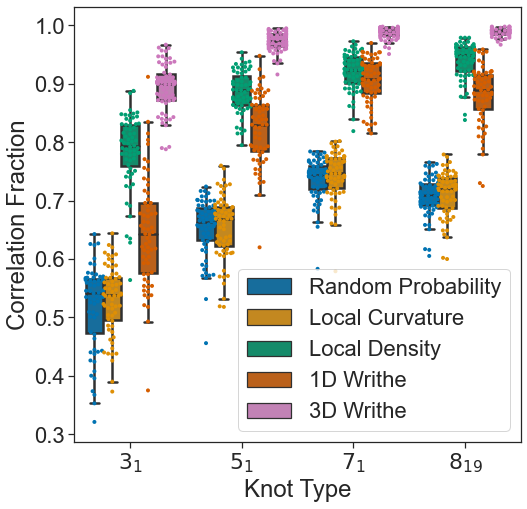

In [50]:
#set figure details
sns.set_theme(style="ticks", palette="colorblind", font_scale=2)
st = sns.axes_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.figure(figsize=(8,8))

#swarmplot
sns.swarmplot(x="Knot Type", y="Correlation Fraction", hue="Representation", data=df, size=4, dodge=True)

ax1 = sns.boxplot(x="Knot Type", y="Correlation Fraction",hue="Representation",data=df, linewidth=2.5, showfliers=False)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles[0:], labels=labels[0:5])

plt.savefig("CorrelationFraction64FinalTESTEST.pdf")

In [51]:
data = []
#Random
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\KNOT"+str(i)+"\WritheMAX_KNOT"+str(Ind[i])+str(rep) + ".lp50.dat"
        f=open(file1,"r")
        lines=f.readlines()[3:] # skip 3 lines of header
        start=[]
        end=[]
        length=[]
        #check if BU_KNOT file is complete
        if (len(lines)<5):
            continue
        for x in lines:
            start.append(int(x.split(' ')[3]))
            end.append(int(x.split(' ')[4]))
            length.append(int(x.split(' ')[5]))
        f.close()
        g=open(file2,"r")
        lines = g.readlines()[1:] #skip header
        max1dwr=[]
        for x in lines:
            max1dwr.append(int(x.split(' ')[2]))
        g.close()

        #max1dwrithe
        prob = 0
        #ring is circular, need to take into account both ends
        for j in range(time):
            if (start[j]>end[j]):
                if ((max1dwr[j]>=start[j]) or (max1dwr[j]<=end[j])):
                    prob+=1
            elif (start[j]<end[j]):
                if ((max1dwr[j]>start[j]) and (max1dwr[j]<end[j])):
                    prob+=1
                    
        averagelength = np.mean(length)
        #randomprob is the probability of picking a bead inside the knot by chance
        randomprob = averagelength/Nbeads
        
        
#         print('%d %.3f %.3f %.3f %.3f'%(((i*replicas)+rep), prob/time, prob/(time*randomprob), prob/time, prob/(time*randomprob)))
        
        # initialize list of lists
        data.append([Indlabel[i], rep, randomprob, prob/(time*randomprob), "Random Probability"])
        
        
#LC      
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\Round2\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\Round2\KNOT"+str(i)+"\LCWMAX_KNOT"+str(Ind[i])+str(rep) + ".dat"
        f=open(file1,"r")
        lines=f.readlines()[3:] # skip 3 lines of header
        start=[]
        end=[]
        length=[]
        #check if BU_KNOT file is complete
        if (len(lines)<5):
            continue
        for x in lines:
            start.append(int(x.split(' ')[3]))
            end.append(int(x.split(' ')[4]))
            length.append(int(x.split(' ')[5]))
        f.close()
        g=open(file2,"r")
        lines = g.readlines()
        maxlcw=[]
        for x in lines:
            maxlcw.append(int(x.split(' ')[2]))
        g.close()
#         print(maxlcw)    

        #maxlcw
        prob = 0
        #ring is circular, need to take into account both ends
        for j in range(time):
            if (start[j]>end[j]):
                if ((maxlcw[j]>=start[j]) or (maxlcw[j]<=end[j])):
                    prob+=1
            elif (start[j]<end[j]):
                if ((maxlcw[j]>start[j]) and (maxlcw[j]<end[j])):
                    prob+=1
                    
        averagelength = np.mean(length)
        #randomprob is the probability of picking a bead inside the knot by chance
        randomprob = averagelength/Nbeads
        
        
#         print('%d %.3f %.3f %.3f %.3f'%(((i*replicas)+rep), prob/time, prob/(time*randomprob), prob/time, prob/(time*randomprob)))
        
        # initialize list of lists
        data.append([Indlabel[i], rep, prob/time, prob/(time*randomprob), "Local Curvature"])

#LD
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\Round2\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\Round2\KNOT"+str(i)+"\LDMAX_KNOT"+str(Ind[i])+str(rep) + ".dat"
        f=open(file1,"r")
        lines=f.readlines()[3:] # skip 3 lines of header
        start=[]
        end=[]
        length=[]
        #check if BU_KNOT file is complete
        if (len(lines)<5):
            continue
        for x in lines:
            start.append(int(x.split(' ')[3]))
            end.append(int(x.split(' ')[4]))
            length.append(int(x.split(' ')[5]))
        f.close()
        g=open(file2,"r")
        lines = g.readlines()
        maxld=[]
        for x in lines:
            maxld.append(int(x.split(' ')[2]))
        g.close()
#         print(maxld)    

        #maxld
        prob = 0
        #ring is circular, need to take into account both ends
        for j in range(time):
            if (start[j]>end[j]):
                if ((maxld[j]>=start[j]) or (maxld[j]<=end[j])):
                    prob+=1
            elif (start[j]<end[j]):
                if ((maxld[j]>start[j]) and (maxld[j]<end[j])):
                    prob+=1
                    
        averagelength = np.mean(length)
        #randomprob is the probability of picking a bead inside the knot by chance
        randomprob = averagelength/Nbeads
        
        
#         print('%d %.3f %.3f %.3f %.3f'%(((i*replicas)+rep), prob/time, prob/(time*randomprob), prob/time, prob/(time*randomprob)))
        
        # initialize list of lists
        data.append([Indlabel[i], rep, prob/time, prob/(time*randomprob), "Local Density"])        
        
        
#1DWrithe
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\KNOT"+str(i)+"\WritheMAX_KNOT"+str(Ind[i])+str(rep) + ".lp50.dat"
        f=open(file1,"r")
        lines=f.readlines()[3:] # skip 3 lines of header
        start=[]
        end=[]
        length=[]
        #check if BU_KNOT file is complete
        if (len(lines)<5):
            continue
        for x in lines:
            start.append(int(x.split(' ')[3]))
            end.append(int(x.split(' ')[4]))
            length.append(int(x.split(' ')[5]))
        f.close()
        g=open(file2,"r")
        lines = g.readlines()[1:] #skip header
        max1dwr=[]
        for x in lines:
            max1dwr.append(int(x.split(' ')[2]))
        g.close()
#         print(max1dwr)    

        #max1dwrithe
        prob = 0
        #ring is circular, need to take into account both ends
        for j in range(time):
            if (start[j]>end[j]):
                if ((max1dwr[j]>=start[j]) or (max1dwr[j]<=end[j])):
                    prob+=1
            elif (start[j]<end[j]):
                if ((max1dwr[j]>start[j]) and (max1dwr[j]<end[j])):
                    prob+=1
                    
        averagelength = np.mean(length)
        #randomprob is the probability of picking a bead inside the knot by chance
        randomprob = averagelength/Nbeads
        
        
#         print('%d %.3f %.3f %.3f %.3f'%(((i*replicas)+rep), prob/time, prob/(time*randomprob), prob/time, prob/(time*randomprob)))
        
        # initialize list of lists
        data.append([Indlabel[i], rep, prob/time, prob/(time*randomprob), "1D Writhe"])
        
#3DWRITHE
for i in range(len(Ind)):
    for rep in range(replicas):
        file1 = "D:\SH\KNOT"+str(i)+"\BU__KN_KNOT"+str(Ind[i])+str(rep) + ".dat"
        file2 = "D:\SH\KNOT"+str(i)+"\WritheMAX_KNOT"+str(Ind[i])+str(rep) + ".lp50.dat"
        f=open(file1,"r")
        lines=f.readlines()[3:] # skip 3 lines of header
        start=[]
        end=[]
        length=[]
        #check if BU_KNOT file is complete
        if (len(lines)<5):
            continue
        for x in lines:
            start.append(int(x.split(' ')[3]))
            end.append(int(x.split(' ')[4]))
            length.append(int(x.split(' ')[5]))
        f.close()

        g=open(file2,"r")
        lines = g.readlines()[1:] #skip header
        max3dwr=[]
        for x in lines:
            max3dwr.append(int(x.split(' ')[4]))
        g.close()
#         print(max3dwr)    

        #max3dwrithe
        prob = 0
        #ring is circular, need to take into account both ends
        for j in range(time):
            if (start[j]>end[j]):
                if ((max3dwr[j]>=start[j]) or (max3dwr[j]<=end[j])):
                    prob+=1
            elif (start[j]<end[j]):
                if ((max3dwr[j]>start[j]) and (max3dwr[j]<end[j])):
                    prob+=1
                    
        averagelength = np.mean(length)
        #randomprob is the probability of picking a bead inside the knot by chance
        randomprob = averagelength/Nbeads
        
        
#         print('%d %.3f %.3f %.3f %.3f'%(((i*replicas)+rep), prob/time, prob/(time*randomprob), prob/time, prob/(time*randomprob)))
        
        # initialize list of lists
        data.append([Indlabel[i], rep, prob/time, prob/(time*randomprob), "3D Writhe"])        
        
        
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Knot Type', 'Replica #', 'Correlation Fraction', 'Correlation Score', 'Representation'])
# print dataframe.
df
df.to_csv("KnotColocalisationScore.csv")

c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\josep\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points c

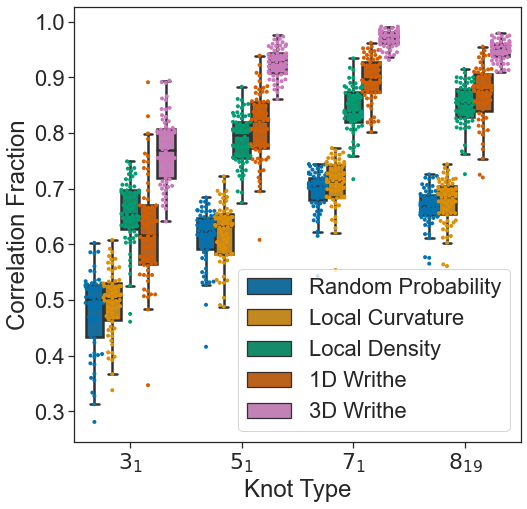

In [52]:
#set figure details
sns.set_theme(style="ticks", palette="colorblind", font_scale=2)
st = sns.axes_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.figure(figsize=(8,8))

#swarmplot
sns.swarmplot(x="Knot Type", y="Correlation Fraction", hue="Representation", data=df, size=4, dodge=True)

ax1 = sns.boxplot(x="Knot Type", y="Correlation Fraction",hue="Representation",data=df, linewidth=2.5, showfliers=False)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles[0:], labels=labels[0:5])

plt.savefig("CorrelationFraction64Final.pdf")